In [2]:
import os
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import shutil

(24, 24) 0


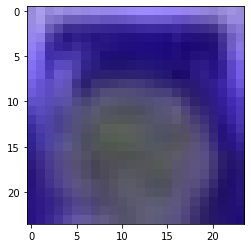

In [18]:
# boards + cords + fields
# for i in range(5150):
#     try:
#         shutil.copy(os.path.join('boards + cords + fields (old)', f'{i}F.txt'), os.path.join('boards+cords+fields(p)', f'{i}F.txt'))
#         shutil.copy(os.path.join('boards + cords + fields (old)', f'{i}.txt'), os.path.join('boards+cords+fields(p)', f'{i}.txt'))
#         shutil.copy(os.path.join('boards + cords + fields (old)', f'{i}.jpg'), os.path.join('boards+cords+fields(p)', f'{i}.jpg'))
#     except:
#         pass

# imgFilesRR = os.listdir('labelren (pc, pics + cords + fields) 1/pictures')
# for idx, imgN in enumerate(imgFilesRR):
#     try:
#         with open(os.path.join('labelren (pc, pics + cords + fields) 1/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
#             cords = f.read().replace('[', '').replace(']', '').split(',')
#             x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
#             cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
#             cords[:, 1] = 168 - cords[:, 1]
#         with open(os.path.join('boards+cords+fields(p)', f'{5150+idx}.txt'), 'w') as f:
#             f.write(str(cords.tolist()))
#         shutil.copy(os.path.join('labelren (pc, pics + cords + fields) 1/lists', f'{imgN.replace("lbrn.jpeg", "list.txt")}'), os.path.join('boards+cords+fields(p)', f'{5150+idx}F.txt'))
#         shutil.copy(os.path.join('labelren (pc, pics + cords + fields) 1/pictures', imgN), os.path.join('boards+cords+fields(p)', f'{5150+idx}.jpg'))
#     except:
#         pass

# imgFilesT = [file for file in os.listdir('boards+cords+fields(p)') if file.endswith('.jpg')]
# # print(imgFilesT)
# for idx, imgN in enumerate(imgFilesT):
#     os.rename(os.path.join('boards+cords+fields(p)', imgN), os.path.join('boards+cords+fields', f'{idx}.jpg'))
#     os.rename(os.path.join('boards+cords+fields(p)', f"{imgN.replace('.jpg', '.txt')}"), os.path.join('boards+cords+fields', f'{idx}.txt'))
#     os.rename(os.path.join('boards+cords+fields(p)', f"{imgN.replace('.jpg', 'F.txt')}"), os.path.join('boards+cords+fields', f'{idx}F.txt'))

# for i in range(5006):
#     test_img = Image.open(f'boards+cords+fields/{i}.jpg')
#     coords = open(f'boards+cords+fields/{i}.txt').read()
#     fields = eval(open(f'boards+cords+fields/{i}F.txt').read())[::-1]
    
#     coords = coords.replace('[', '').replace(']', '').split(',')
#     x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) for x in coords]

#     M = cv2.getPerspectiveTransform(np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]]), np.float32([(0, 0), (168, 0), (168, 144), (0, 144)]))
#     warped = cv2.warpPerspective(np.array(test_img), M, (168, 144))
#     warped = Image.fromarray(warped)

#     for row in range(6):
#         for column in range(7):
#             cropped = warped.crop((column * (168 / 7), row * (144 / 6), (column + 1) * (168 / 7), (row + 1) * (144 / 6)))
#             cropped.save(f"fields/{i}_{row}_{column}.jpg")
#             with open(f"fields/{i}_{row}_{column}.txt", 'w') as f:
#                 f.write(str(fields[row*7+column]))

# imgFilesFields = [file for file in os.listdir('fields') if file.endswith('.jpg')]
# for idx, imgN in enumerate(imgFilesFields):
#     os.rename(os.path.join('fields', imgN), os.path.join('fields', f'{idx}.jpg'))
#     os.rename(os.path.join('fields', f"{imgN.replace('.jpg', '.txt')}"), os.path.join('fields', f'{idx}.txt'))

In [8]:
# boards + cords
imgFiles0 = [file for file in os.listdir('labelren (pc, pics + cords)') if file.endswith('.jpeg')]
for idx, imgN in enumerate(imgFiles0):
    img = Image.open(os.path.join('labelren (pc, pics + cords)', imgN))
    img.save(os.path.join('boards+cords', f'{idx}.jpg'))
    shutil.copy(os.path.join('labelren (pc, pics + cords)', f"lbrn{imgN.replace('lbrn.jpeg', '.txt')}"), os.path.join('boards+cords', f'{idx}.txt'))

imgFiles1 = [file for file in os.listdir('labelren (laptop, pics + cords)') if file.endswith('.jpeg')]
for idx, imgN in enumerate(imgFiles1):
    img = Image.open(os.path.join('labelren (laptop, pics + cords)', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0)}.jpg'))
    shutil.copy(os.path.join('labelren (laptop, pics + cords)', f"lbrn{imgN.replace('lbrn.jpeg', '')}.txt"), os.path.join('boards+cords', f'{idx + len(imgFiles0)}.txt'))

imgFiles2 = os.listdir('labelren (laptop, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles2):
    img = Image.open(os.path.join('labelren (laptop, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1)}.jpg'))
    with open(os.path.join('labelren (laptop, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles3 = os.listdir('labelren (pc, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles3):
    img = Image.open(os.path.join('labelren (pc, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2)}.jpg'))
    with open(os.path.join('labelren (pc, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles4 = os.listdir('labelren (anjo, pics + cords + fields)/pictures')
for idx, imgN in enumerate(imgFiles4):
    img = Image.open(os.path.join('labelren (anjo, pics + cords + fields)/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3)}.jpg'))
    with open(os.path.join('labelren (anjo, pics + cords + fields)/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

imgFiles5 = os.listdir('labelren (pc, pics + cords + fields) 1/pictures')
for idx, imgN in enumerate(imgFiles5):
    img = Image.open(os.path.join('labelren (pc, pics + cords + fields) 1/pictures', imgN))
    img.save(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3) + len(imgFiles4)}.jpg'))
    with open(os.path.join('labelren (pc, pics + cords + fields) 1/coords', f"{imgN.replace('lbrn.jpeg', 'coords.txt')}"), 'r') as f:
        cords = f.read().replace('[', '').replace(']', '').split(',')
        x1, y1, x2, y2, x3, y3, x4, y4 = [float(cord) for cord in cords]
        cords = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        cords[:, 1] = 168 - cords[:, 1]
    with open(os.path.join('boards+cords', f'{idx + len(imgFiles0) + len(imgFiles1) + len(imgFiles2) + len(imgFiles3) + len(imgFiles4)}.txt'), 'w') as f:
        f.write(str(cords.tolist()))

[1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2]
14.410339415073395 25.97716999053955 156.0612988471985 22.44902515411377 155.03296422958374 142.8235934972763 15.042505502700806 139.1729199886322


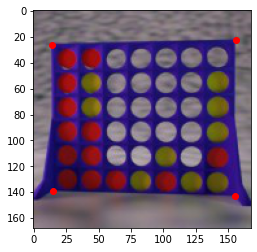

In [38]:
test_img = Image.open('boards+cords+fields/3000.jpg')
coords = open('boards+cords+fields/3000.txt').read()
fields = eval(open('boards+cords+fields/3000F.txt').read())[::-1]
print(fields)
coords = coords.replace('[', '').replace(']', '').split(',')
x1, y1, x2, y2, x3, y3, x4, y4 = [float(x) for x in coords]
# cords[:, 1] = 168 - cords[:, 1]
print(x1, y1, x2, y2, x3, y3, x4, y4)
plt.imshow(test_img)
plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'ro')


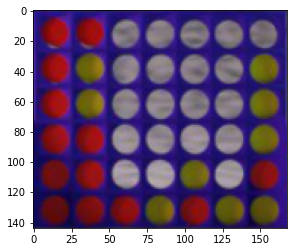

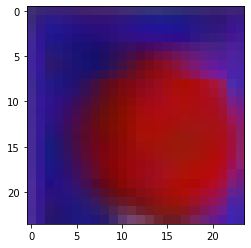

1


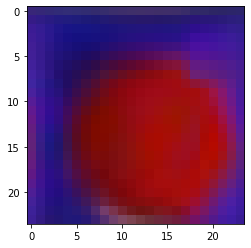

1


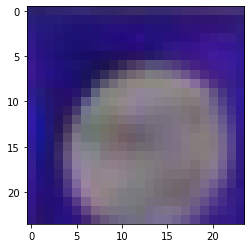

0


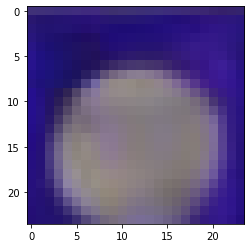

0


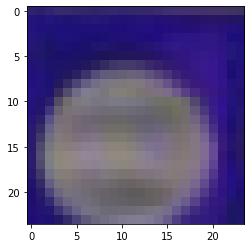

0


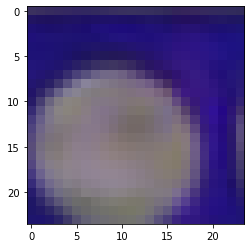

0


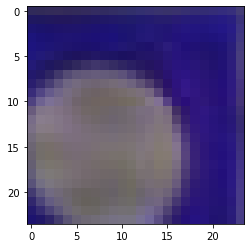

0


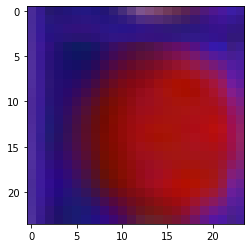

1


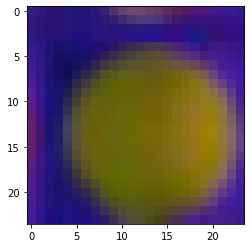

2


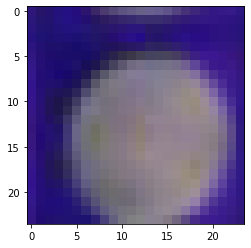

0


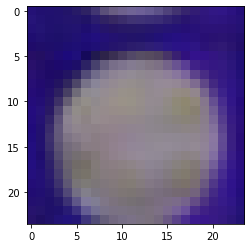

0


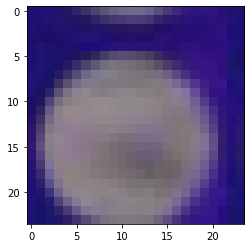

0


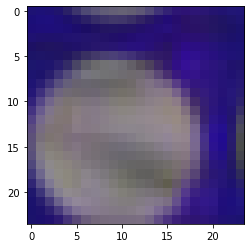

0


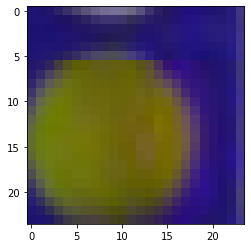

2


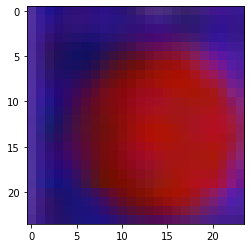

1


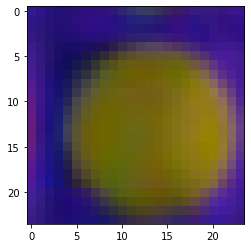

2


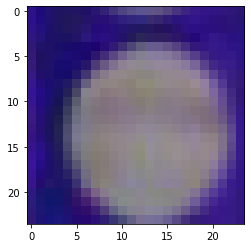

0


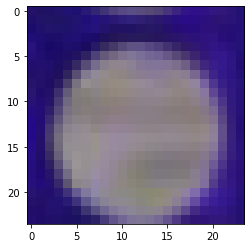

0


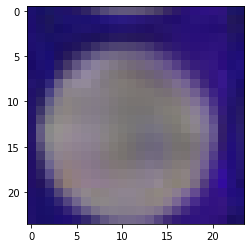

0


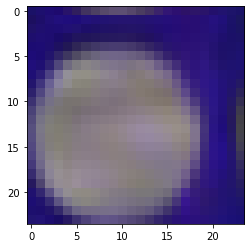

0


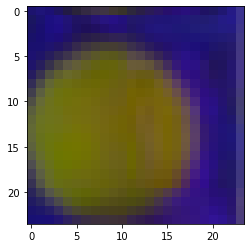

2


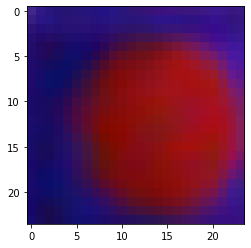

1


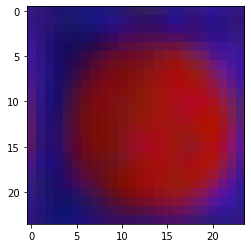

1


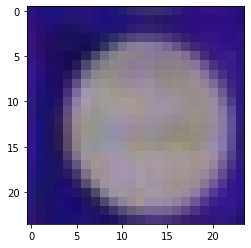

0


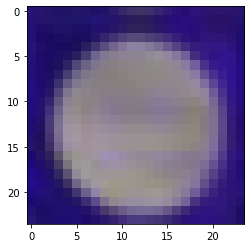

0


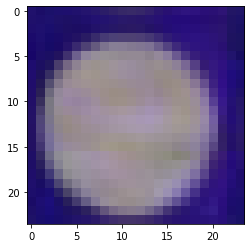

0


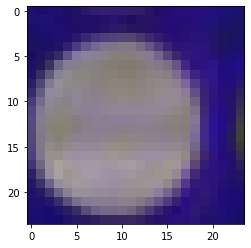

0


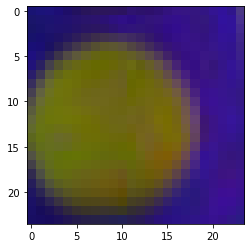

2


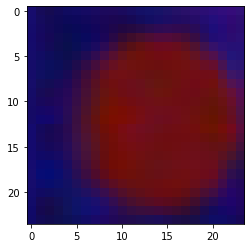

1


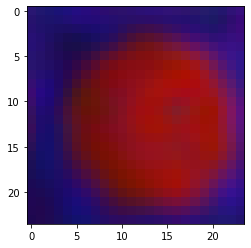

1


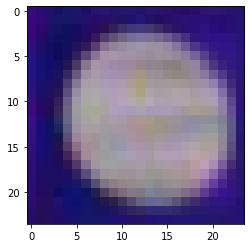

0


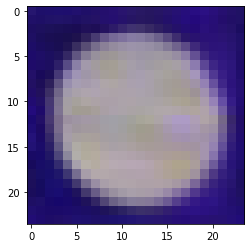

0


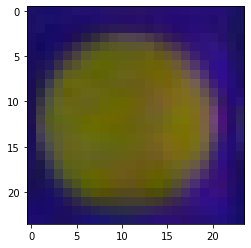

2


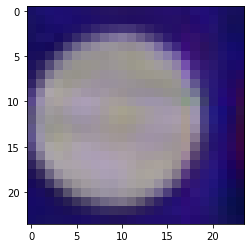

0


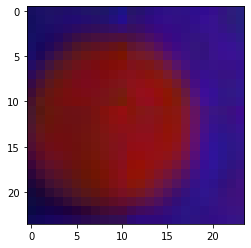

1


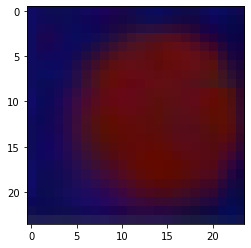

1


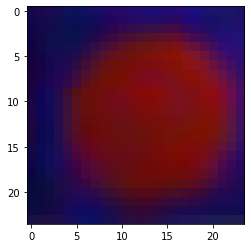

1


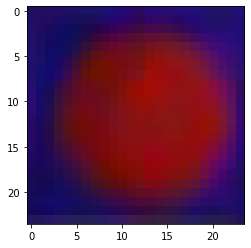

1


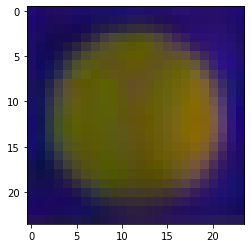

2


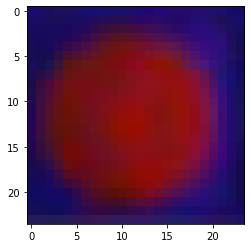

1


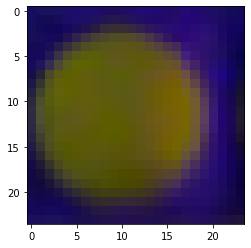

2


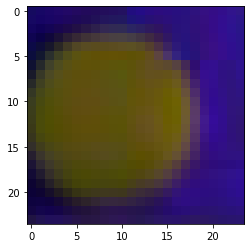

2


In [39]:
M = cv2.getPerspectiveTransform(np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]]), np.float32([(0, 0), (168, 0), (168, 144), (0, 144)]))
warped = cv2.warpPerspective(np.array(test_img), M, (168, 144))
warped = Image.fromarray(warped)
plt.imshow(warped)
plt.show()

for row in range(6):
    for column in range(7):
        cropped = warped.crop((column * (168 / 7), row * (144 / 6), (column + 1) * (168 / 7), (row + 1) * (144 / 6)))
        cropped.save(str(row) + str(column) + '.jpg')
        plt.imshow(cropped)
        plt.show()
        print(fields[row*7 + column])
        

In [20]:
def mirror(img, coords):
    img = np.flip(np.array(img), axis=1)
    img = Image.fromarray(img)
    coords[:, 0] = img.width - coords[:, 0]
    return img, coords

In [21]:
mirrorImg, mirrorCords = mirror(test_img.copy(), np.array([top_left, top_right, bottom_right, bottom_left]))

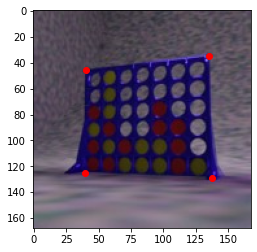

In [24]:
plt.imshow(mirrorImg)
plt.plot(mirrorCords[:, 0], mirrorCords[:, 1], 'ro')